In [24]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import cartopy.feature as cf

ox.config(use_cache=True, log_console=True)

In [ ]:
#cr = ox.graph_from_place("Costa Rica", network_type='all_private')

In [16]:
#ox.save_graph_geopackage(cr, filepath="\output\cr_allPrivate.gpkg") #save graph
networkFile = r"C:\Users\isaldiviagonzatti\Downloads\gitFiles\MScThesisCode\FLP\output\cr_allPrivate.gpkg"

In [17]:
#fig, ax = ox.plot_graph(cr)

# load GeoPackage as node/edge GeoDataFrames indexed (because downloaded and saved first)
gdf_nodes = gpd.read_file(networkFile, layer='nodes').set_index('osmid')
gdf_edges = gpd.read_file(networkFile, layer='edges').set_index(['u', 'v', 'key'])
assert gdf_nodes.index.is_unique and gdf_edges.index.is_unique


In [31]:
# a peak at the edges data
gdf_edges.head(5)

osmid lanes ref  \
u         v          key                                     
181418077 1216933451 0                 751775953     2   1   
          2755475495 0                 751775953     2   1   
          1216933436 0                 105681440             
183801752 2755465948 0    [428148669, 270518503]             
          1216938667 0                 751775958     2   1   

                                                    name      highway  oneway  \
u         v          key                                                        
181418077 1216933451 0    Carretera Interamericana Norte        trunk   False   
          2755475495 0    Carretera Interamericana Norte        trunk   False   
          1216933436 0                        Avenida 3A  residential   False   
183801752 2755465948 0         ['Calle 11', 'Avenida 8']  residential   False   
          1216938667 0    Carretera Interamericana Norte        trunk   False   

                         reversed   length        from         to bridge  \
u         v          key                                                   
181418077 1216933451 0       True   37.729  1216933451  181418077          
          2755475495 0      False   16.087  2755475495  181418077          
          1216933436 0      False  160.678  1216933436  181418077          
183801752 2755465948 0       True  296.815  2755465948  183801752          
          1216938667 0       True  133.061  1216938667  183801752          

                         maxspeed access service tunnel junction width  \
u         v          key                                                 
181418077 1216933451 0                                                   
          2755475495 0                                                   
          1216933436 0                                                   
183801752 2755465948 0                                                   
          1216938667 0                                                   

                                                                   geometry  
u         v          key                                                     
181418077 1216933451 0    LINESTRING (-85.63020 11.07478, -85.63014 11.0...  
          2755475495 0    LINESTRING (-85.63011 11.07430, -85.63014 11.0...  
          1216933436 0    LINESTRING (-85.63160 11.07429, -85.63078 11.0...  
183801752 2755465948 0    LINESTRING (-85.62709 11.06803, -85.62741 11.0...  
          1216938667 0    LINESTRING (-85.62908 11.07005, -85.62894 11.0...

In [18]:
# convert the node/edge GeoDataFrames to a MultiDiGraph
graph_attrs = {'crs': 'epsg:4326', 'simplified': True}
G2 = ox.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs)

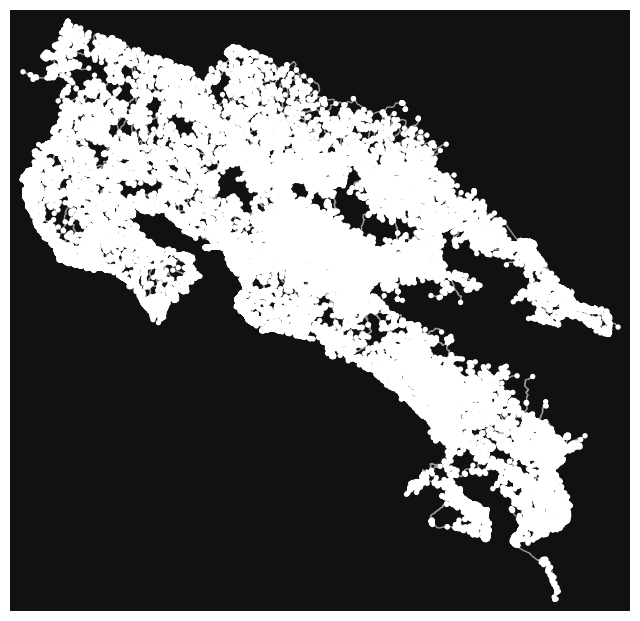

In [19]:
fig, ax = ox.plot_graph(G2)

In [25]:
#create nodes and streets(edges) variables from graph
#nodes, streets = ox.graph_to_gdfs(cr)

#save nodes to folder
#nodes.to_file("nodesCR")

In [59]:
land = cf.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='10m',
    facecolor=cf.COLORS['land'],
    alpha=0.5)

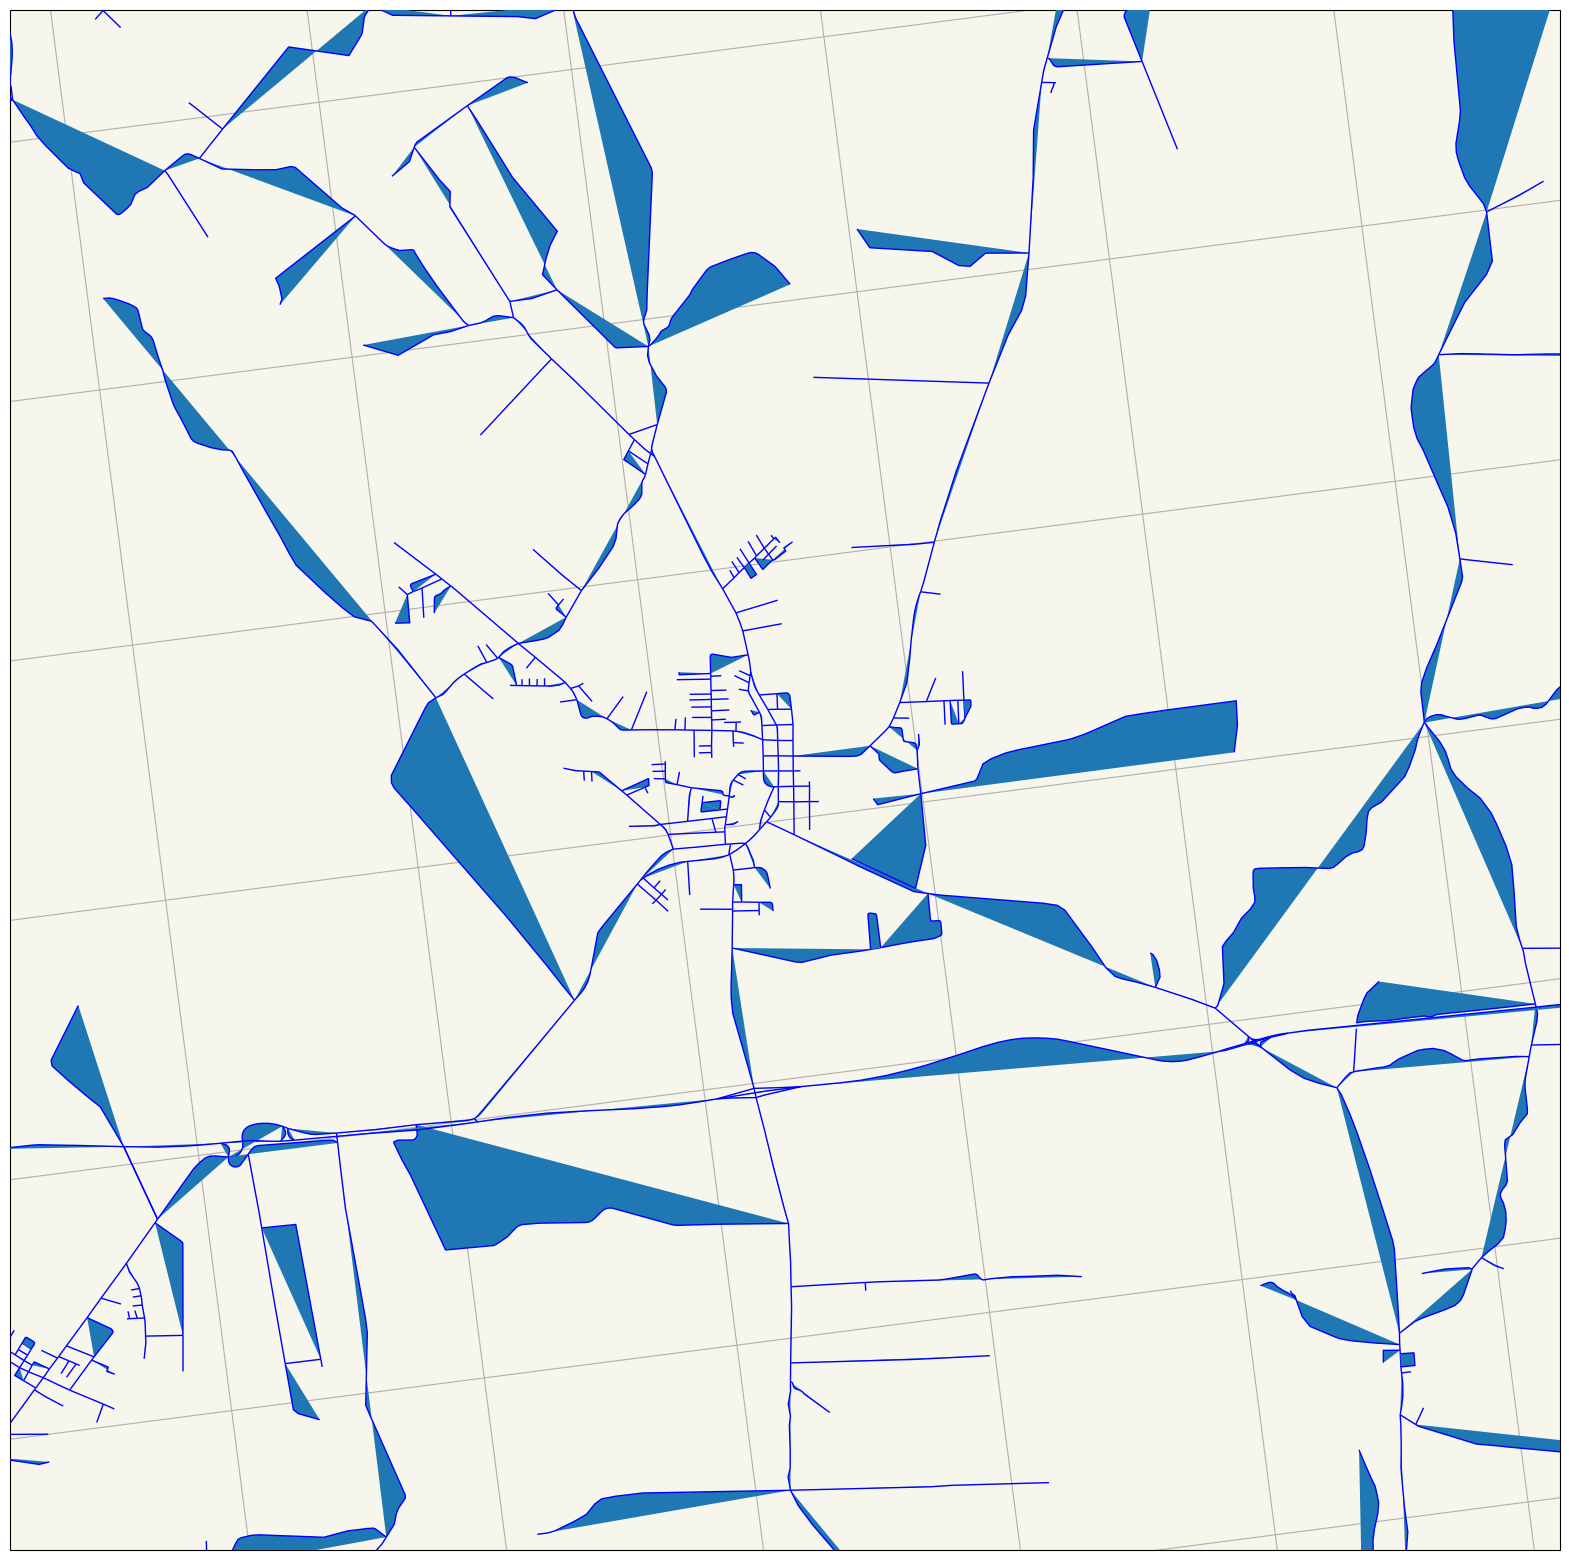

In [26]:
### plotting edges for Pital

figure = plt.figure(figsize=(20,20))
ax = plt.axes(projection = ccrs.LambertConformal())

ax.set_extent([-84.313711, -84.232153, 10.412284, 10.492346 ]) #coordinates 

ax.add_geometries(gdf_nodes.geometry, crs=ccrs.PlateCarree(), zorder=5, edgecolor='blue') 

ax.add_feature(land)

ax.gridlines()

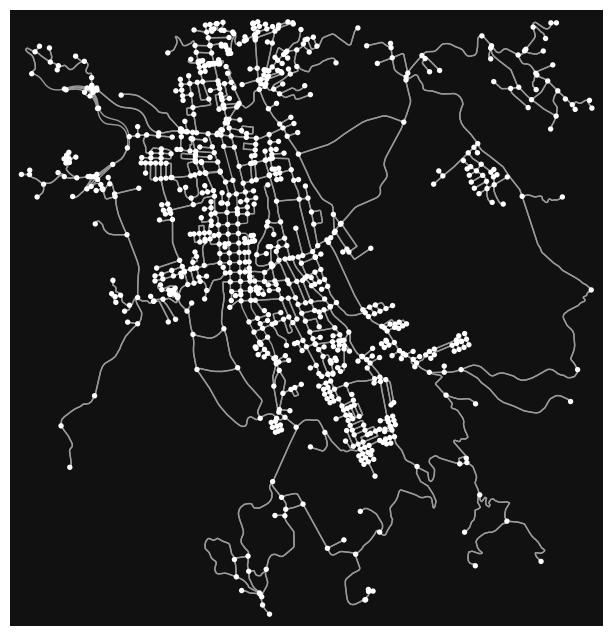

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [28]:
## plotting network departing from point in Quesada

G = ox.graph_from_point((10.319461, -84.425394), dist=3000, network_type='all_private')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)